In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.stats import mode
from statistics import mean
import matplotlib.pyplot as plt

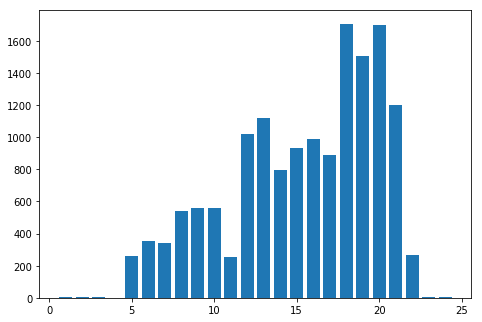

[1.9764554741640215, 2.034102092160472, 2.0711606323010474, 1.7952803890323197, 260.3691854121116, 351.2614315302295, 340.02034102092165, 537.8058873667438, 559.0198427894377, 556.5492734467326, 251.09219753025425, 1019.311617028811, 1118.7026216858344, 798.5909519515441, 931.9564026863327, 989.5083155246463, 890.9984805998545, 1707.7069410645688, 1507.179062748344, 1699.6858259319195, 1201.890809070284, 266.48796215087776, 1.9435145495946213, 2.042337323302822]


In [2]:
def get_activity_plan(cluster,day,target):
    activity_plan = []
    df = pd.read_csv("Dataset/SecondLevel/Cluster "+str(cluster+1)+'/'+day+'.csv')
    largest = int(mode(df['Cluster'])[0])
    temp = []
    count = 0
    row,column = 0,0
    for index in df.index:
        if df.at[index,'Cluster']==largest:
            temp.append(df.at[index,'ID'])
            count+=1
    hour = [[0 for i in range(24)] for j in range(count)]
    ttl_hr_avg = [0] * 24
    for id in temp:
        user = pd.read_csv("Dataset/FitnessDetails/Steps/"+str(id)+'.csv',index_col = 0)
        column = 0
        for col in user.columns:
            
            if col=='Total Steps':
                break
            hour[row][column] = user.at[day.split('.')[0].capitalize(),col].mean()
            column+=1
        row+=1
    ttl_hr_avg = ([mean(x) for x in zip(*hour)])
    ttl_steps = sum(ttl_hr_avg)
    
    
    for i in range(24):
        activity_plan.append((ttl_hr_avg[i]/ttl_steps)*target)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = [i for i in range(1,25)]
    ax.bar(x,activity_plan)
    plt.show()
    print(activity_plan)

get_activity_plan(1,"Tuesday",15000)

    
    
